In [16]:
# IMPORTS
import re, numpy as np, random
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pathlib import Path
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [17]:
films=[]
for p in Path("C:/Users/forem/Code/text-as-data/people/Foreman/Adventure").glob('*.txt'):
    with open(p, mode="r", encoding="utf-8") as f:
        film = f.read()
        films.append(film)


print(len(films))

166


In [3]:
sample = random.choice(films)
# print(sample)
print(sia.polarity_scores(sample))

{'neg': 0.09, 'neu': 0.77, 'pos': 0.14, 'compound': 1.0}


In [4]:
positive_words = [word for word in sample.split() if sia.polarity_scores(word)['compound'] > 0]
print("Positive Words:", positive_words)

Positive Words: ['FAIR', 'WORTH', 'CLEAR.', 'LOVE', 'BEAUTY', 'share', 'BEAUTIFUL!', 'POWERFUL!', 'STRONGER', 'STRONGER', 'STRONGER', 'FAIR', 'WORTH', 'CLEAR.', 'LOVE', 'BEAUTY', 'play.', 'play', 'want', 'smiles.', 'hand.', 'excited.', 'laughs', 'amazing!', 'laughing.', 'PLAY', 'like', 'warm', 'hugs.', 'hugs', 'love', 'fearlessly', 'hand!', 'Please,', 'help.', 'luckily,', 'bright', 'hand', 'hugs', 'Cuties.', 'GRAND', 'determined.', 'respectfully', 'GRAND', 'stronger.', 'Grand', 'GRAND', 'lucky', 'easily', 'GRAND', 'recommend', 'fun.', 'Grand', 'energy', 'Grand', 'play', 'GRAND', 'okay.', 'best.', 'creating', 'beauty', 'great', 'protect', 'sure.', 'gentle', 'Want', 'WANT', 'PLAY.', 'LIKE', 'plays', 'BEST', 'WISH', 'WANT', 'longingly.', 'freeze', 'help.', 'hand.', 'WANT', 'gaining', 'courageous', 'like', 'playing', 'stronger.', 'hug', 'want', 'fine,', 'PLEASE', 'COURAGE', 'PLEASE', 'WANT', 'Welcome', 'excitedly', 'like', 'want,', 'Please!', 'Share!', 'care', 'riches.', 'Dignitary.', 'lov

Some movies such as Jurassic Park have their positive word count flooded with the main protagonist name if they are seen
as heroic or helpful.

In [5]:
positive_word_count = len([word for word in sample.split() if sia.polarity_scores(word)['compound'] > 0])
print("Number of Positive Words:", positive_word_count)
# This is just for comparison between the total number of positive words when the cells before are rerun to pull a
# different text file

Number of Positive Words: 844


In [6]:
negative_words = [word for word in sample.split() if sia.polarity_scores(word)['compound'] < 0]
print("Negative Words:", negative_words)

Negative Words: ['cuts', 'drag', 'blocks', 'CUT', 'STRIKE', 'STRIKE', 'FEAR.', 'struggles', 'block', 'fails,', 'DANGEROUS!', 'threateningly.', 'fight', 'drag', 'CUT', 'block', 'STRIKE', 'STRIKE', 'FEAR.', 'DANGER', 'block', 'defeated.', 'accidentally', 'STRIKES', 'struck,', 'frightening', 'accident.', 'sorry,', 'SLAM', 'CUT', 'alone', 'SLAM', 'CUT', 'hide', 'frightened', 'crushed!', 'stop', 'worry,', 'leave', 'danger.', 'panic', 'attack', 'Fear', 'enemy.', 'No.', 'disappears.', 'confused', 'sad.', 'sad.', 'Alone,', 'EMPTY', 'no', 'LONELY', 'EMPTY', 'bored', 'panics.', 'scared.', 'upset', 'worse.', 'No.', 'hurt', 'alarmed', 'sadness.', 'stopping.', 'leave', 'rages', 'lost', 'mourning', 'mourning', 'suspended', 'grief.', 'fault.', 'exploit', 'leave', 'sore', 'CUT', 'Sorry', 'No,', 'SLAM', 'CUT', 'EMPTY', 'NO', 'Hides', 'STRANGE.', 'ALONE.', 'ridiculous.', 'BIZARRE.', 'CRAZY', 'WRONG', 'cut', 'nerves.', 'AGONY', 'AGONY', 'LEAVE', 'sorry.', 'hurt?', 'no.', 'No.', 'Awkward.', 'awkward.', 'a

In [7]:
negative_word_count = len([word for word in sample.split() if sia.polarity_scores(word)['compound'] < 0])
print("Number of Negative Words:", negative_word_count)
# This is just for comparison between the total number of negative words when the cells before are rerun to pull a different
# text file

Number of Negative Words: 659


All code above just pulls a random single text file from the films list and displays the list of positive and negative numbers along with the counts for each.

In [8]:
text = films[2]
print(text[0:100])

				    2001: A SPACE ODYSSEY

					    Screenplay

						   by

			   Stanley Kubrick and Arthur C.


In [9]:
print(sia.polarity_scores(text))

{'neg': 0.086, 'neu': 0.797, 'pos': 0.117, 'compound': 1.0}


The two code blocks above create a new item named text based on the films list that allows you to pull
a specified file from the films list. With this new item the next code block runs and returns a polarity score.

In [65]:
sentences = sent_tokenize(text)
# print(sentences[0:10])

scores = []
for sentence in sentences:
    score = sia.polarity_scores(sentence)["compound"]
    scores.append(score)

# print(scores[10:100])

# Program to calculate moving average
window_size = 100

i = 0
# Initialize an empty list to store moving averages
moving_averages = []

# Loop through the array to consider
# every window of size 3
while i < len(scores) - window_size + 1:

	# Store elements from i to i+window_size
	# in list to get the current window
	window = scores[i : i + window_size]

	# Calculate the average of current window
	window_average = round(sum(window) / window_size, 2)
	
	# Store the average of current
	# window in moving average list
	moving_averages.append(window_average)
	
	# Shift window to right by one position
	i += 1

print(len(moving_averages))
print(len(scores))

[-0.5927, -0.6486, 0.5267, -0.4767, 0.0, 0.6486, -0.3818, 0.1764, 0.3818, 0.0, -0.3415, 0.0, 0.1531, -0.3182, 0.7184, -0.1779, 0.0258, -0.7717, 0.0, 0.0, 0.0, 0.0, 0.0667, -0.8638, -0.0227, 0.2382, 0.4416, 0.4404, -0.6523, 0.1628, -0.6705, 0.0, 0.4215, 0.4767, 0.0, -0.5267, 0.1779, -0.4404, -0.3818, -0.7783, -0.4228, -0.6883, 0.0772, -0.2023, -0.7096, 0.0, -0.6607, -0.7003, -0.81, 0.0, -0.34, -0.6764, 0.3182, 0.3818, 0.5423, 0.6705, 0.0, 0.4118, -0.3612, 0.2263, 0.25, 0.2362, 0.0, -0.3612, 0.0772, -0.4588, -0.7579, 0.3612, 0.0258, 0.0, -0.7579, 0.0, 0.0, -0.907, 0.0951, -0.3412, 0.0772, 0.4963, 0.5719, 0.6249, 0.0, -0.2263, 0.7579, 0.659, -0.5859, -0.25, 0.2596, 0.0, -0.1531, 0.0]


The code block above is all the necessary steps to create a sentiment analysis based on the sentences and return the compund scores.
Then it creates an adjustable moving average to go and return an average based on the window size

In [11]:
values = enumerate(moving_averages)
x, y = zip(*values)

The second line of code in the block above takes the value pairs in values and unpacks them into
separate list

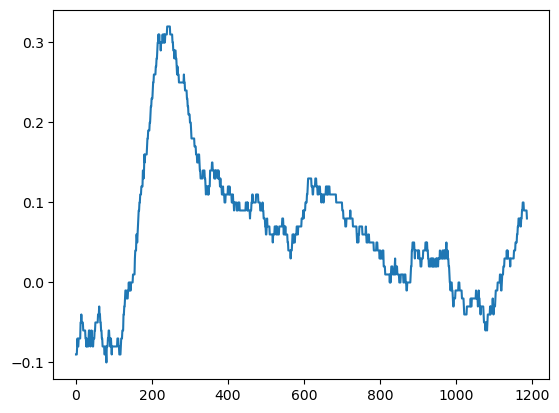

In [12]:
plt.plot(x, y)
plt.show()

In [41]:
film1 = films[5]
film2 = films[10]
film3 = films[15]
film4 = films[20]
film5 = films[25]
# Creating a small pool of 5 separate films.

In [56]:
sentences = []
for film in films:
    tokenized_sentences1 = sent_tokenize(film1)
    sentences.append(tokenized_sentences1)
    tokenized_sentences2 = sent_tokenize(film2)
    sentences.append(tokenized_sentences2)
    tokenized_sentences3 = sent_tokenize(film3)
    sentences.append(tokenized_sentences3)
    tokenized_sentences4 = sent_tokenize(film4)
    sentences.append(tokenized_sentences4)
    tokenized_sentences5 = sent_tokenize(film5)
    sentences.append(tokenized_sentences5)
# This is going through and tokenizing each film based on its sentences and creating a name to choose a specific film

In [130]:
print(tokenized_sentences5[:10])

['                            CLASH OF THE TITANS\n\n                                Written bY\n\n                       John Glenn & Travis Wright\n\n               Based on the 1981 movie "Clash of the Titans"\n\n                                Written by\n\n                              Beverly Cross\n\n                                                           May 28,   2008\n\n                         FADE IN:\n\n          EXT.', 'ALLEYWAY (VILLAGE) - DUSK\n\n          Gloomy, last light.', 'From out of the shadows comes            --\n\n          A DOG.', 'A dog of war.', 'Big, mangy, muscular, scary.', 'As\n\n          he moves down the alley, the way becomes increasingly\n\n          choked with fallen structures.', 'and signs of tumult.', 'EXT.', 'BATTLEFIELD - DUSK\n\n          TRACKING WITH THE DOG as he comes onto a battlefield.', 'The hellish scene is REVEALED TO US SLOWLY --                \n\n          SERIES OF SHOTS\n\n          as the Dog traverses a landscape of --\

In [118]:
scores = []
for sentence in tokenized_sentences1:
    score = sia.polarity_scores(sentence)["compound"]
    scores.append(score)
print(scores[10:100])
# This code block is gathering the compound polarity scores of all sentences in the tokenized_sentences1 file and printing
# the scores for sentences 10:100 to make sure it is gathering the correct scores.
# All similar blocks below are doing the same thing as this one but just for the specified film.

[0.0258, 0.0, 0.0, -0.4215, 0.3182, 0.25, 0.0, 0.0, 0.0, 0.0, -0.0516, 0.0, -0.4939, -0.4278, 0.0, 0.0, 0.0, -0.8225, 0.0, 0.0, 0.0, 0.836, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3612, 0.204, 0.0, -0.4278, 0.0, 0.0, 0.7269, 0.5719, 0.0, 0.5574, 0.0, 0.0, -0.5574, 0.0, 0.6037, -0.6124, 0.0, 0.0, 0.4019, 0.5719, 0.0, 0.0, 0.0, 0.296, 0.0, -0.6841, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4466, -0.296, 0.5859, 0.0, 0.0, -0.4404, 0.5908, -0.6249, 0.0, 0.0, -0.6841, 0.0, 0.0, 0.0, 0.0, -0.3182, -0.5423, -0.1027, -0.4466, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0857, 0.3431, 0.0, 0.0]


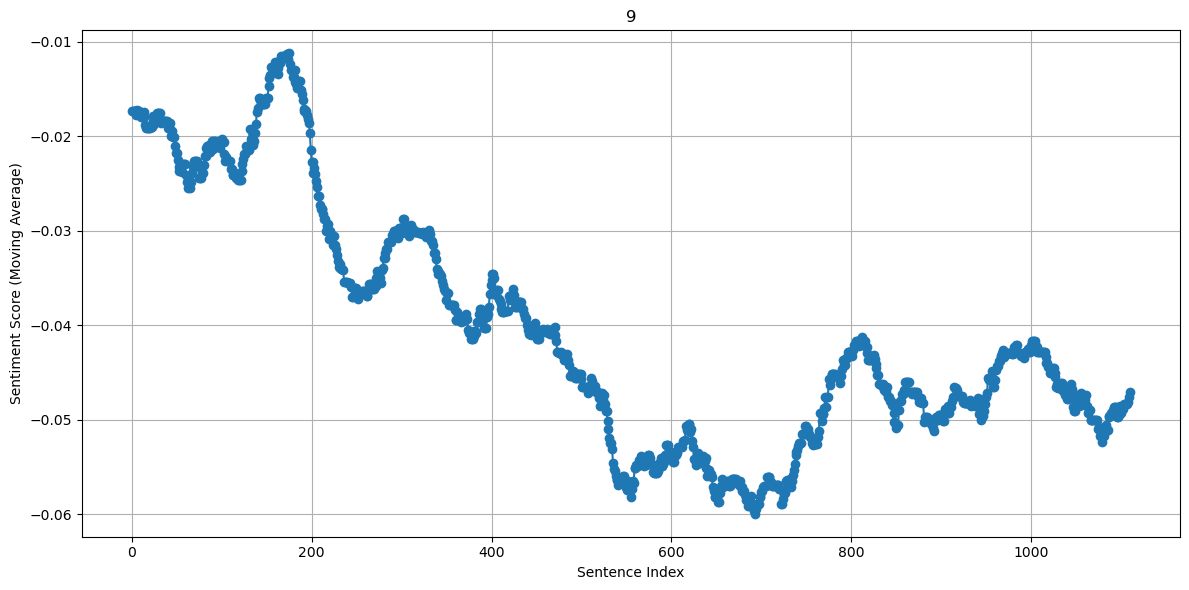

In [119]:
window_size = 750
moving_averages = [np.mean(scores[i:i+window_size]) for i in range(len(scores)-window_size+1)]

# Plot the moving average scores
plt.figure(figsize=(12, 6))
plt.plot(moving_averages, marker='o', linestyle='-')
plt.title('9')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score (Moving Average)')
plt.grid(True)
plt.tight_layout()
plt.show()
# This block is creating a moving average based on the window size stated to display the averages of the sentiment scores based
# on the window size. Adjusting the window size changes how smooth and or jagged the line below appears.
# All similar code blocks below are doing the same thing for their retrospective scores.

In [121]:
scores = []
for sentence in tokenized_sentences2:
    score = sia.polarity_scores(sentence)["compound"]
    scores.append(score)
print(scores[10:100])

[0.4404, -0.1601, 0.0, 0.4215, 0.0, 0.0, 0.0, 0.0, -0.4019, 0.0, 0.0, -0.3182, 0.0, 0.0, -0.7213, 0.0, 0.0, -0.8208, 0.0, 0.0, -0.2732, -0.516, 0.0, -0.0772, 0.6037, 0.0, 0.0, 0.0, 0.4939, 0.0, 0.0, 0.0, -0.6597, 0.0, 0.0, 0.0, 0.25, -0.4404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0258, 0.4939, -0.7125, 0.3328, -0.657, -0.5812, -0.5994, -0.5766, 0.4404, 0.0258, 0.0, 0.0, 0.0, -0.3818, -0.1531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5255, 0.1511, -0.4588, -0.2617, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3254, 0.4404, -0.4019, 0.0, 0.3612, 0.0, -0.7964, 0.0, 0.0, 0.0, 0.0, -0.5106, 0.0, 0.0, 0.6597, 0.0]


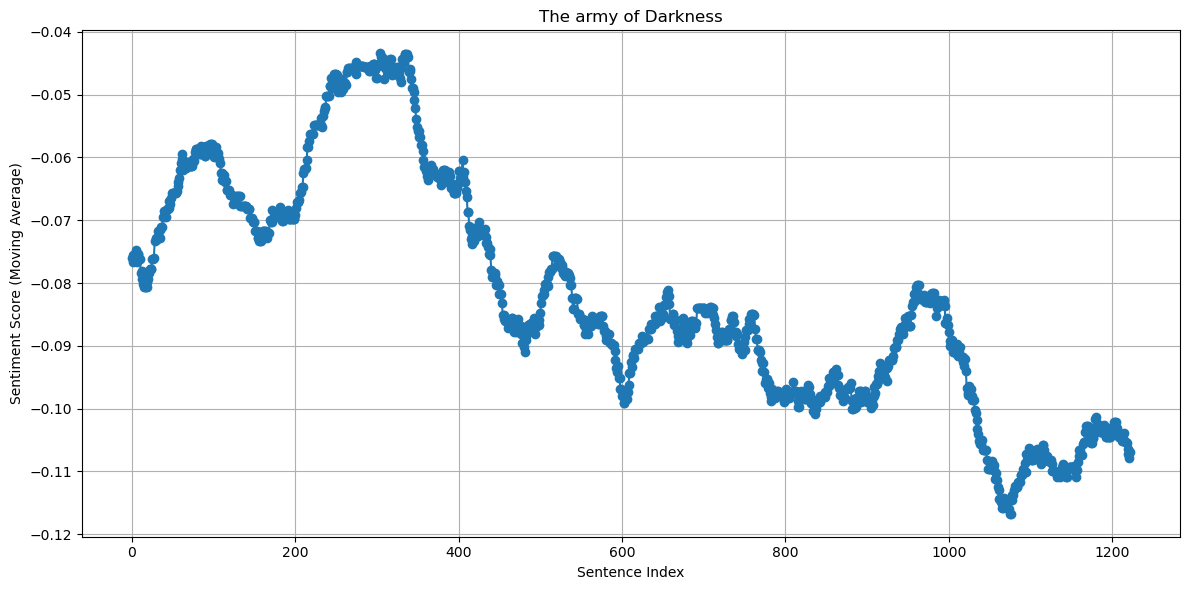

In [122]:
window_size = 500
moving_averages = [np.mean(scores[i:i+window_size]) for i in range(len(scores)-window_size+1)]

# Plot the moving average scores
plt.figure(figsize=(12, 6))
plt.plot(moving_averages, marker='o', linestyle='-')
plt.title('The army of Darkness')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score (Moving Average)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [124]:
scores = []
for sentence in tokenized_sentences3:
    score = sia.polarity_scores(sentence)["compound"]
    scores.append(score)
print(scores[10:100])

[0.0, 0.0, 0.296, 0.0, 0.2235, 0.0, 0.0, 0.0, -0.8625, 0.0, 0.0, 0.4939, 0.0, 0.0, -0.296, 0.0, 0.0, 0.0, 0.0, -0.8201, 0.6124, 0.0, 0.6781, 0.0, 0.0, -0.2732, 0.0, 0.7351, 0.0, 0.4939, 0.296, 0.0, 0.0, 0.4019, -0.34, 0.4404, 0.0, -0.3182, -0.4215, 0.0, 0.0, 0.0, -0.765, 0.1027, 0.2263, 0.5574, 0.0, 0.6124, 0.4767, -0.5574, 0.0, -0.34, 0.0, 0.0, 0.0, 0.0, 0.6124, -0.4168, 0.0, -0.249, 0.0, 0.0, 0.0, 0.1779, 0.2732, 0.5719, 0.0516, 0.0, 0.4585, 0.0, -0.4493, 0.0, 0.0, 0.0, 0.0, 0.6523, 0.0, -0.4168, 0.6705, 0.4824, 0.5719, 0.6705, 0.296, 0.0, -0.3612, 0.0, -0.2748, 0.0, 0.0, 0.7506]


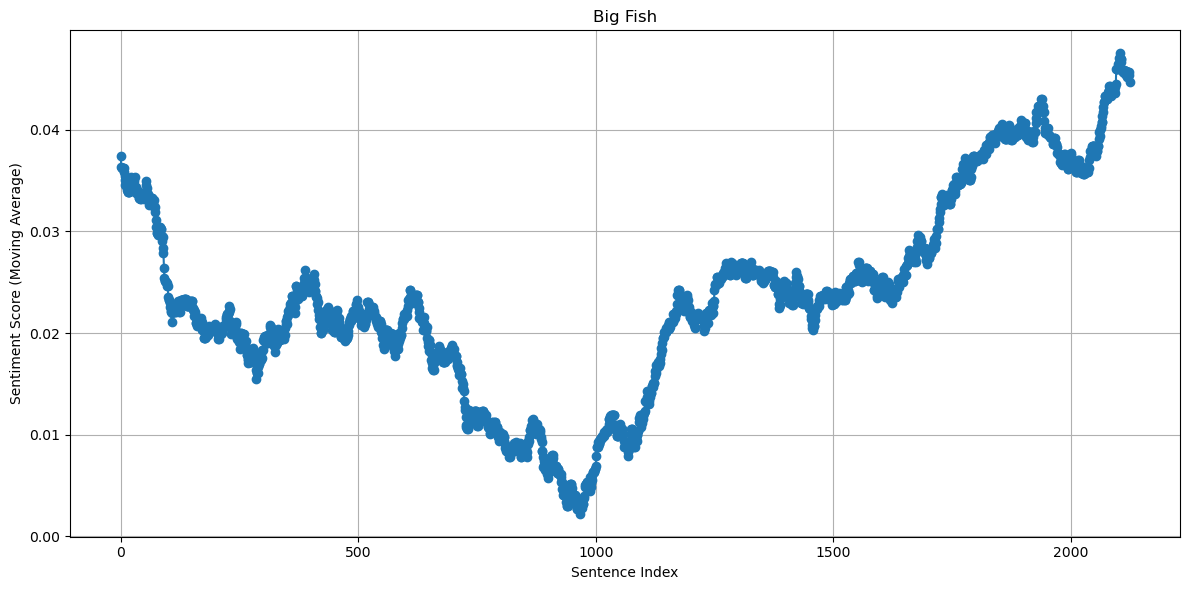

In [125]:
window_size = 1000
moving_averages = [np.mean(scores[i:i+window_size]) for i in range(len(scores)-window_size+1)]

# Plot the moving average scores
plt.figure(figsize=(12, 6))
plt.plot(moving_averages, marker='o', linestyle='-')
plt.title('Big Fish')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score (Moving Average)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:
scores = []
for sentence in tokenized_sentences4:
    score = sia.polarity_scores(sentence)["compound"]
    scores.append(score)
print(scores[10:100])

[0.0, 0.0, 0.0, 0.0, -0.6808, 0.0, 0.0, 0.0, 0.0, -0.5622, -0.3612, 0.0, 0.4939, 0.0, -0.4019, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4588, 0.0, 0.0, 0.5423, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4215, 0.0, 0.0, 0.34, 0.0, 0.9001, -0.4585, 0.0, 0.0, 0.3612, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1531, 0.2023, 0.6369, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4939, 0.0, 0.1779, 0.0, 0.0, -0.5994, 0.25, 0.0, 0.0, 0.0, -0.296, 0.0, 0.0, 0.0, 0.4767, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3713, 0.0, 0.4588, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6486, 0.0, 0.0]


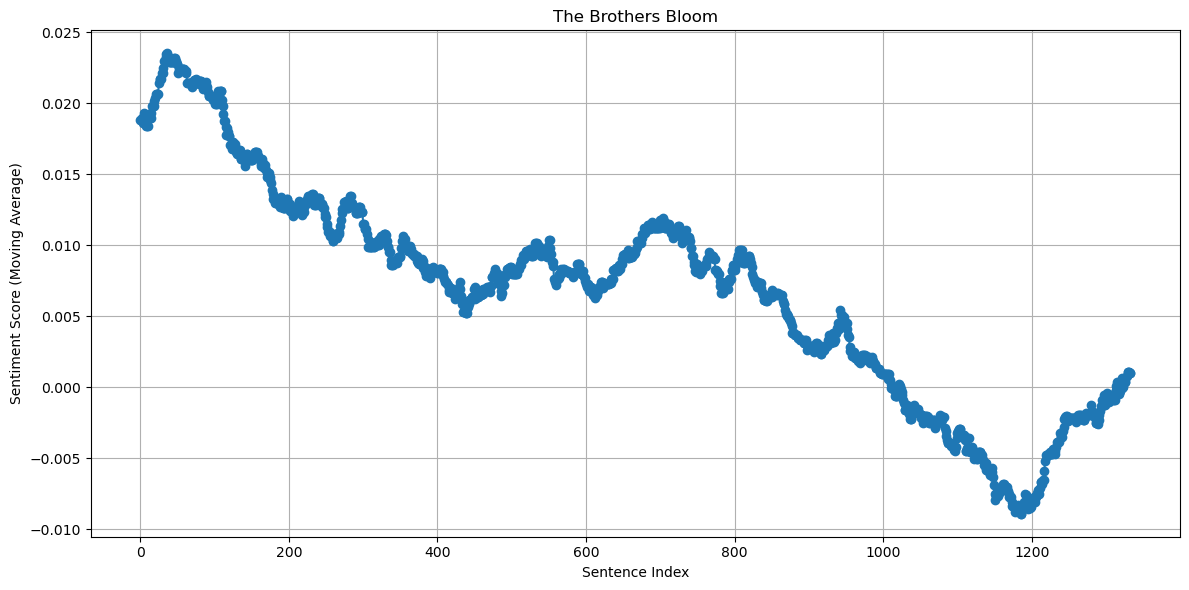

In [128]:
window_size = 1500
moving_averages = [np.mean(scores[i:i+window_size]) for i in range(len(scores)-window_size+1)]

# Plot the moving average scores
plt.figure(figsize=(12, 6))
plt.plot(moving_averages, marker='o', linestyle='-')
plt.title('The Brothers Bloom')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score (Moving Average)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [129]:
scores = []
for sentence in tokenized_sentences5:
    score = sia.polarity_scores(sentence)["compound"]
    scores.append(score)
print(scores[10:100])

[-0.7351, 0.0, -0.2023, -0.8225, 0.0, 0.0, -0.2263, 0.0, 0.5319, 0.4939, 0.0, 0.0, 0.0, 0.0, 0.0, 0.516, 0.0, -0.1531, 0.0, 0.5719, 0.0, 0.0, 0.0, 0.0, 0.0, 0.296, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.7034, -0.1531, 0.0, 0.6283, -0.4215, -0.4404, 0.0, -0.296, -0.34, 0.0, -0.4404, 0.0, 0.0, -0.7906, 0.0, -0.2732, -0.5319, -0.8979, -0.4588, 0.0139, 0.0, 0.0, -0.4995, 0.0, 0.0, -0.4005, -0.34, 0.0, -0.4389, 0.0, 0.0, -0.3612, -0.4902, 0.0, 0.2732, 0.2003, -0.2732, 0.7684, 0.0, -0.0772, 0.0, 0.0, 0.0, 0.4767, 0.4574, 0.5859, 0.0, -0.8439, -0.7959, -0.4939, -0.4404, -0.875, 0.0, 0.0, 0.0, 0.2461, -0.2023, 0.0]


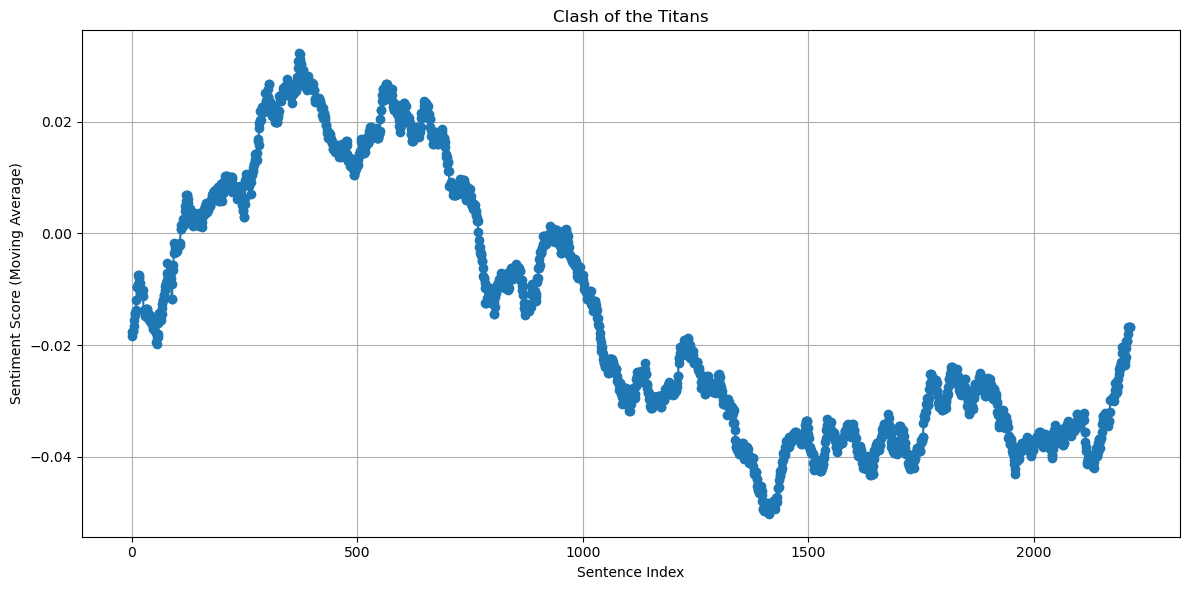

In [131]:
window_size = 500
moving_averages = [np.mean(scores[i:i+window_size]) for i in range(len(scores)-window_size+1)]

# Plot the moving average scores
plt.figure(figsize=(12, 6))
plt.plot(moving_averages, marker='o', linestyle='-')
plt.title('Clash of the Titans')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score (Moving Average)')
plt.grid(True)
plt.tight_layout()
plt.show()

Results for the 3 films are interesting especially The Army of Darkness which nevers seems to manage a positive polarity score throughout the entire film. Some films even start off positive and then start a steady decline into the negative such as The Brothers Bloom.